In [1]:
import matplotlib.pyplot as plt
import numpy as np
print(np.__version__)
import torch 
import torch.nn as nn

import pandas as pd
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

2.2.4


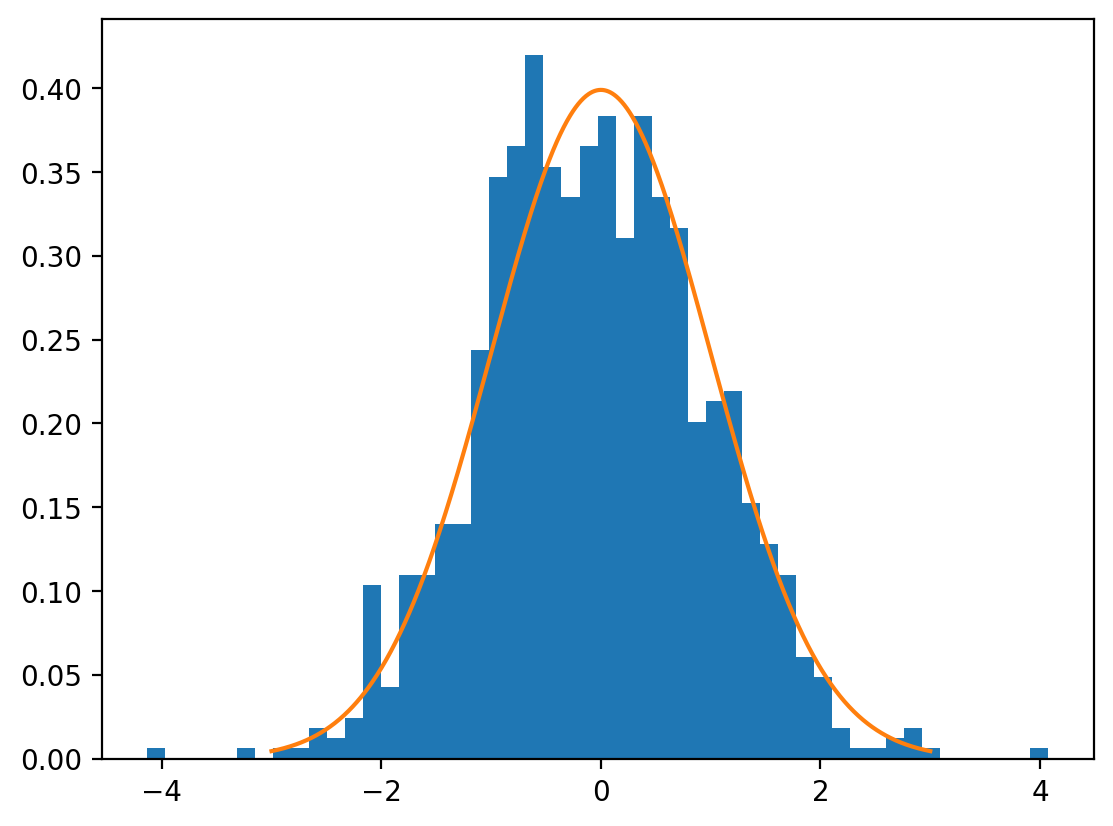

In [2]:
dist = torch.distributions.Normal(0, 1)
x = dist.sample((1000,))
plt.hist(x.numpy(), bins=50, density=True)

x_range = torch.linspace(-3, 3, 1000)
y = dist.log_prob(x_range).exp()
plt.plot(x_range.numpy(), y.numpy())

In [3]:
dist.sample([10])

tensor([-1.9083,  0.3758,  0.0051,  0.5140,  0.9852, -0.5989,  0.5222, -0.7744,
         0.9462, -1.7868])

In [4]:
dist_2d_normal = torch.distributions.MultivariateNormal(torch.tensor([0.0, 0.0]), torch.eye(2))
dist_2d_normal.sample([10])

tensor([[ 0.8966,  1.0857],
        [ 1.8956, -0.6984],
        [ 1.2194,  0.5181],
        [ 0.3381, -0.0392],
        [-0.2047, -0.4560],
        [-1.3552, -0.3871],
        [-0.2139, -0.8495],
        [ 0.0496,  1.7242],
        [-0.8782,  0.8101],
        [ 2.5491, -0.3234]])

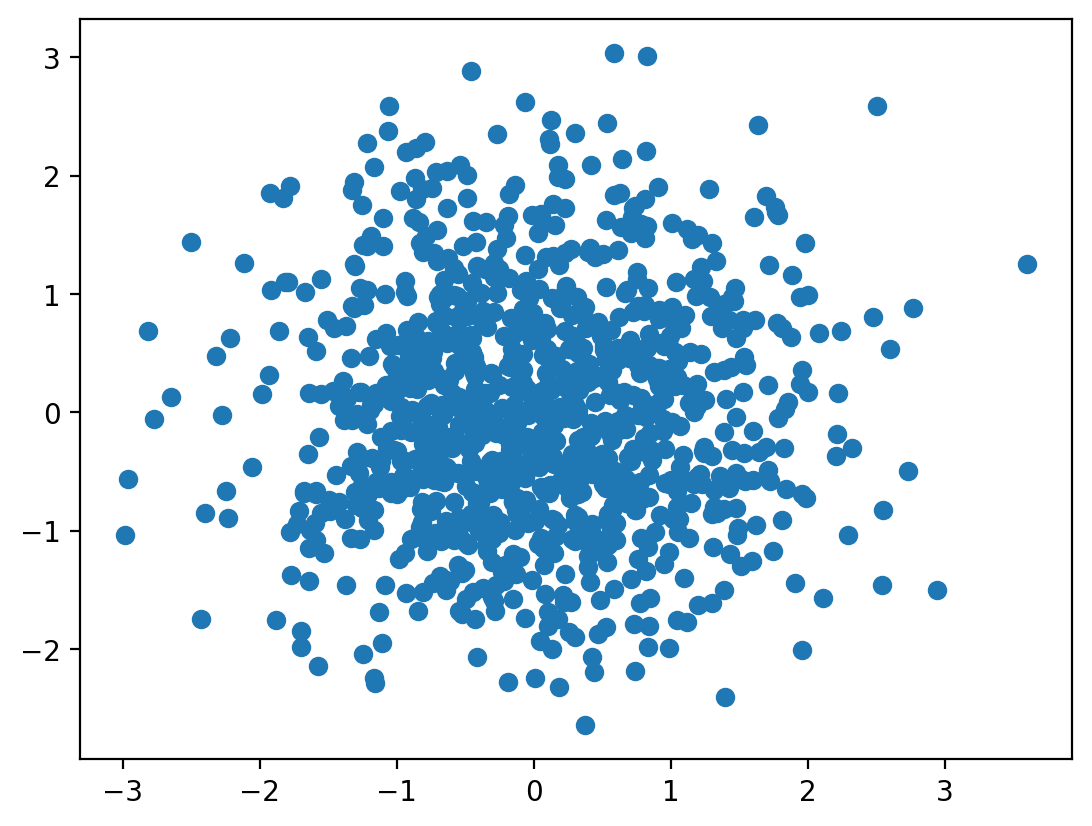

In [5]:
plt.scatter(*dist_2d_normal.sample([1000]).numpy().T)

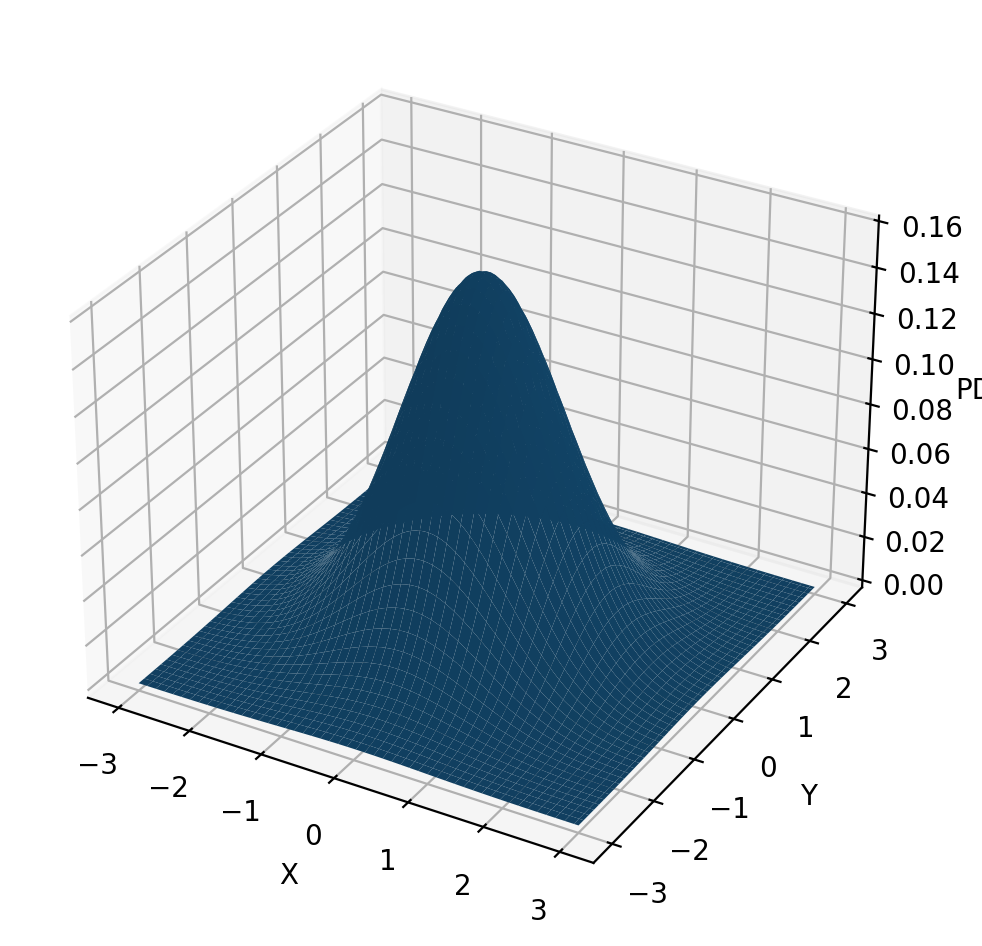

In [7]:
# Plot 2D normal distribution surface plot of PDF
from mpl_toolkits.mplot3d import Axes3D

x = torch.linspace(-3, 3, 100)
y = torch.linspace(-3, 3, 100)

X, Y = torch.meshgrid(x, y)
xy = torch.stack([X, Y], 2)
z = dist_2d_normal.log_prob(xy).exp()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X.numpy(), Y.numpy(), z.numpy())

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PDF')

fig.tight_layout()

In [34]:
df = pd.read_html("http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html")

In [35]:
store_df = df[0]
store_df.columns = store_df.iloc[0]
store_df = store_df.iloc[1:]
store_df = store_df.astype(float)
store_df = store_df.drop(columns=["Index"])
store_df = store_df.dropna()

In [36]:
store_df.head()

,Height(Inches),Weight(Pounds)
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


In [39]:
### Fiting a bi-variate normal distribution to the data
data = torch.tensor(store_df.values)
mean = data.mean(0)
cov = torch.cov(data.T)
dist = torch.distributions.MultivariateNormal(mean, cov)

In [41]:
dist.loc

tensor([ 67.9931, 127.0794], dtype=torch.float64)

In [42]:
dist.covariance_matrix

tensor([[  3.6164,  11.1510],
        [ 11.1510, 135.9765]], dtype=torch.float64)

Text(0, 0.5, 'Weight')

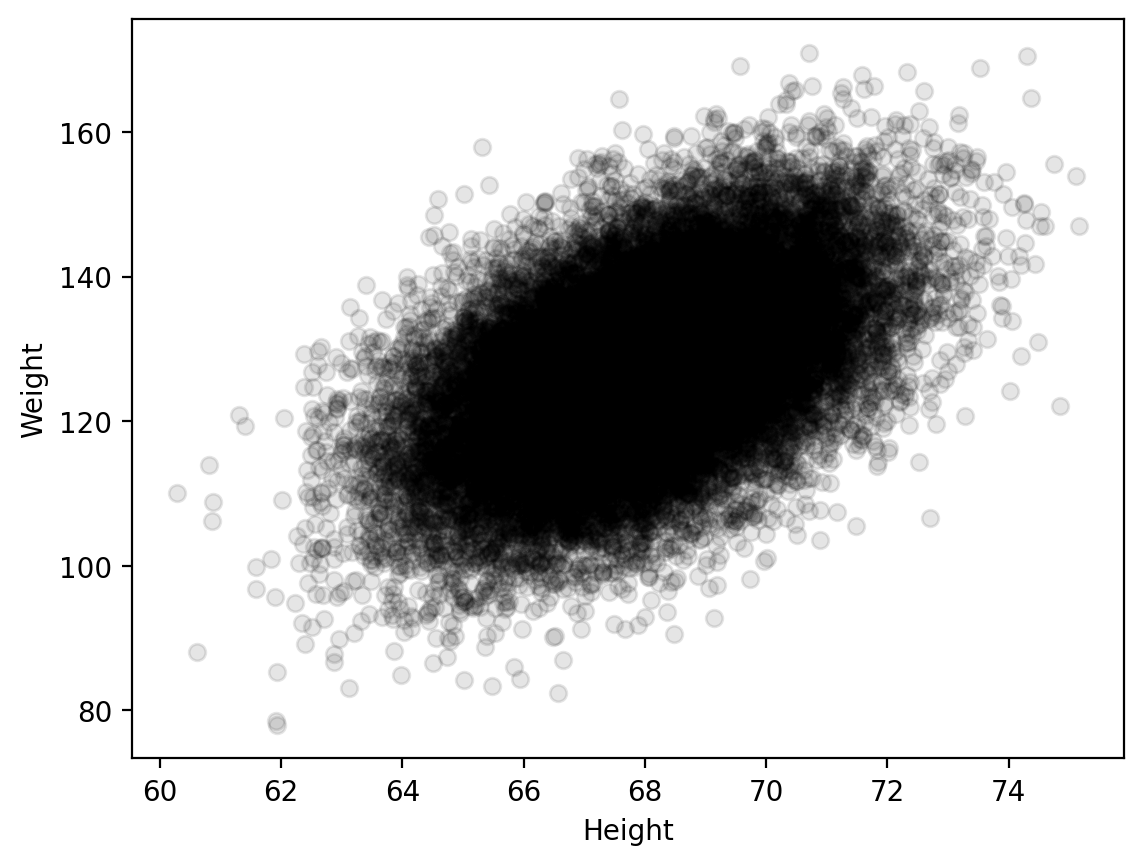

In [47]:
# Plot the data

plt.scatter(data[:, 0], data[:, 1], alpha=0.1, color='k', facecolors='k')
plt.xlabel("Height")
plt.ylabel("Weight")



In [55]:
# plot the PDF
x = torch.linspace(50, 80, 100)
y = torch.linspace(80, 280, 100)
X, Y = torch.meshgrid(x, y)
xy = torch.stack([X, Y], 2)
z = dist.log_prob(xy).exp()

import plotly.graph_objects as go

# Create surface plot with custom hover labels
fig = go.Figure(data=[go.Surface(
    x=X, y=Y, z=z, colorscale="viridis",
    hovertemplate="Height: %{x:0.2f}<br>Weight: %{y:0.2f}<br>PDF: %{z:0.5f}<extra></extra>"
)])

# Maximize figure size and reduce whitespace
fig.update_layout(
    autosize=True,
    width=1200,  # Set wider figure
    height=700,  # Set taller figure
    margin=dict(l=0, r=0, t=40, b=0),  # Remove extra whitespace
    title="2D Gaussian PDF",
    scene=dict(
        xaxis_title="Height",
        yaxis_title="Weight",
        zaxis_title="PDF"
    )
)

# Show plot
fig.show()

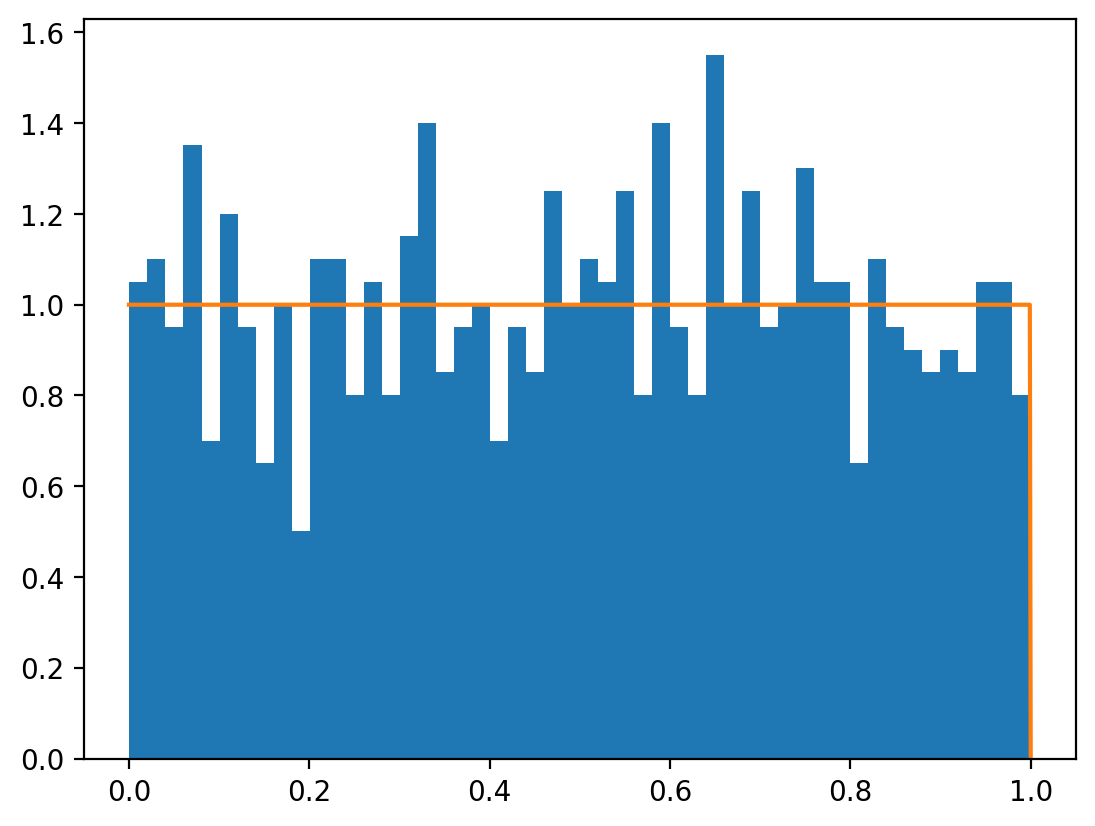

In [8]:
# uniform distribution
dist_uniform = torch.distributions.Uniform(0, 1)
x = dist_uniform.sample((1000,))
plt.hist(x.numpy(), bins=50, density=True)

x_range = torch.linspace(0, 1, 1000)
y = dist_uniform.log_prob(x_range).exp()
plt.plot(x_range.numpy(), y.numpy())


In [9]:
dist_uniform_2d = torch.distributions.Uniform(torch.tensor([0.0, 0.0]), torch.tensor([1.0, 1.0]))
dist_uniform_2d.sample([10])

tensor([[0.5616, 0.8790],
        [0.5337, 0.3128],
        [0.3291, 0.4818],
        [0.0944, 0.0806],
        [0.9693, 0.4371],
        [0.6927, 0.1281],
        [0.7620, 0.0081],
        [0.2285, 0.0637],
        [0.7492, 0.0922],
        [0.5008, 0.5269]])

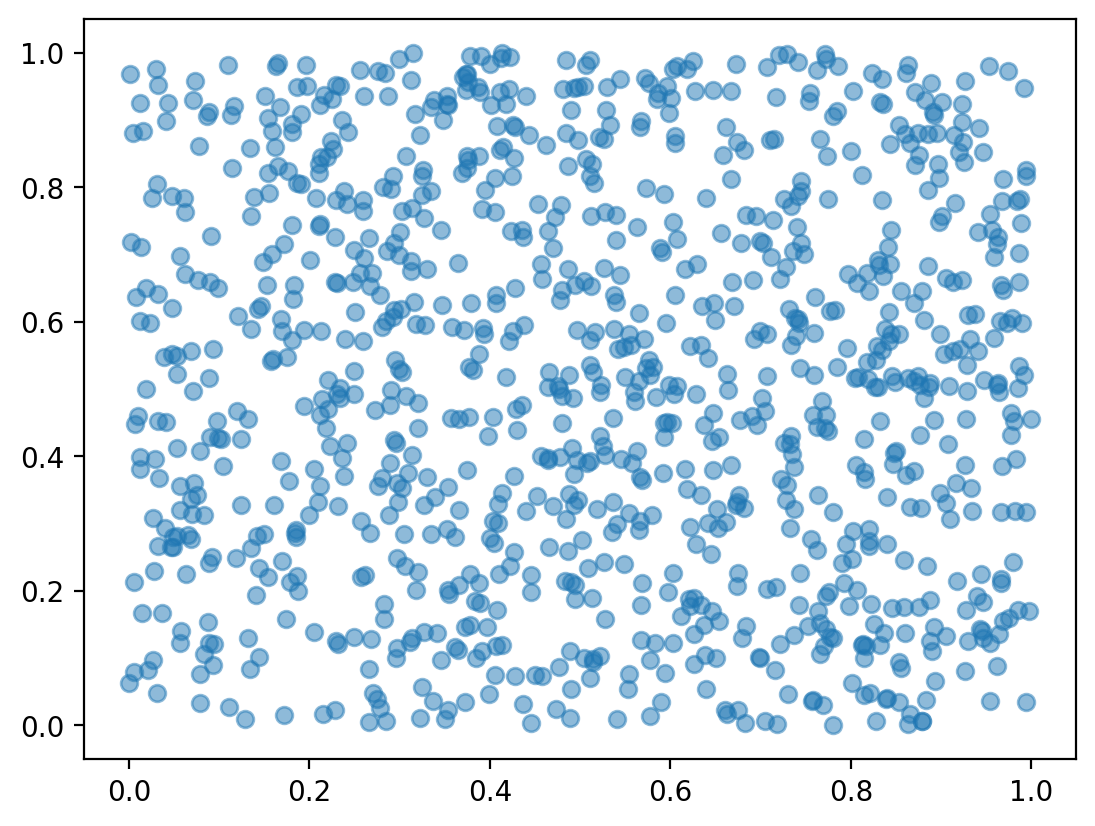

In [10]:
plt.scatter(*dist_uniform_2d.sample([1000]).numpy().T, alpha=0.5)

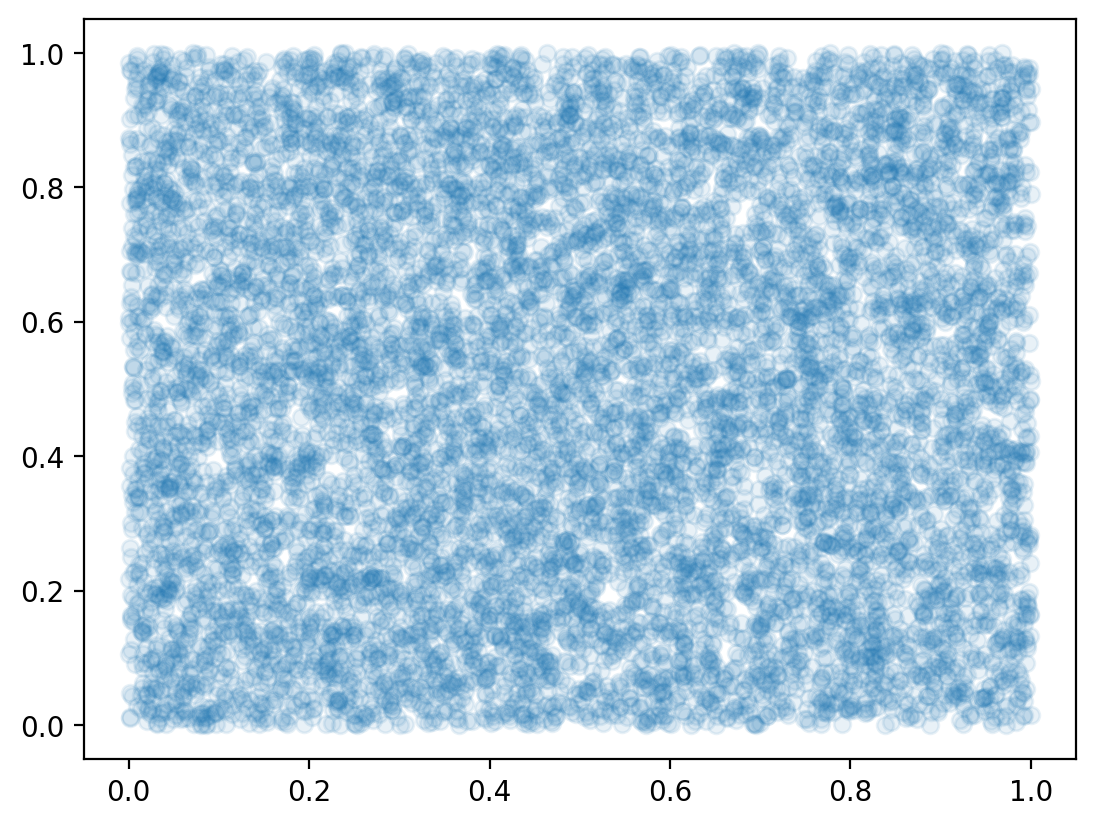

In [11]:
plt.scatter(*dist_uniform_2d.sample([10000]).numpy().T, alpha=0.1)

In [57]:
# surface plot of PDF

x = torch.linspace(0.0, 1.0, 100)
y = torch.linspace(0.0, 1.0, 100)

X, Y = torch.meshgrid(x, y)
xy = torch.stack([X, Y], 2)

Text(0.5, 0, 'PDF')

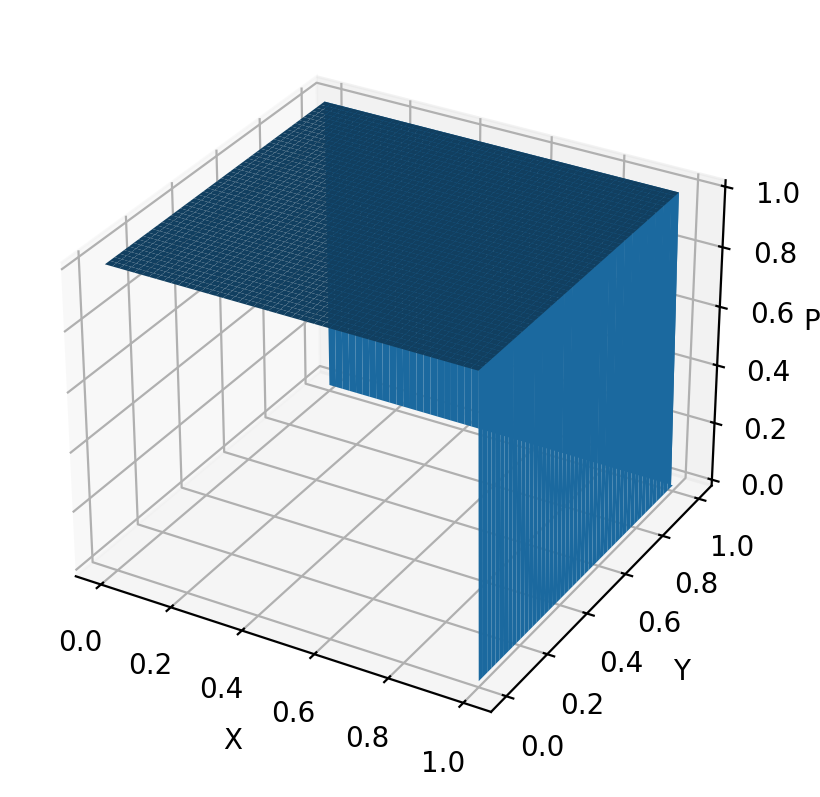

In [59]:

## Important:
## f(x, y) = f(x) * f(y) for independent random variables
## log(f(x, y)) = log(f(x)) + log(f(y))
z1 = dist_uniform_2d.log_prob(xy).sum(-1).exp()
z2 = dist_uniform.log_prob(X).exp() * dist_uniform.log_prob(Y).exp()
assert torch.allclose(z1, z2) 


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X.numpy(), Y.numpy(), z1.numpy())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PDF')